# EXPERIMENTS with Alpha Vantage data

In [4]:
# import base64
# import io
import requests
# from flask import jsonify
# from matplotlib import pyplot as plt
# import matplotlib.dates as mdates
from datetime import datetime
import json
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# define api key for Aplha Vantage API
API_KEY = 'NSQ25HG8ERO35TPU'

In [57]:
def get_stock_data_premium(symbol, outputsize="full"):
  """
  Returns the stock prices in json format

  symbol: the stock symbol (e.g. "AAPL")
  outputsize: "full" - all 20 years of data, "compact" - 100 last days ("full" only for API premium subscription)
  """
  api_key = API_KEY
  URL = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize={outputsize}&apikey={api_key}"
  response = requests.get(URL)
  data = response.json()
  return data

In [66]:
def get_stock_data(symbol):
  """
  Returns the stock prices in json format
  symbol: the stock symbol (e.g. "AAPL")
  """
  api_key = API_KEY
  URL = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&interval=5min&apikey={api_key}"
  response = requests.get(URL)
  data = response.json()
  return data

In [67]:
apple = "AAPL"

In [68]:
data = get_stock_data(symbol=apple)
data["Time Series (Daily)"]

{'2024-06-14': {'1. open': '213.8500',
  '2. high': '215.1700',
  '3. low': '211.3000',
  '4. close': '212.4900',
  '5. volume': '70122748'},
 '2024-06-13': {'1. open': '214.7400',
  '2. high': '216.7500',
  '3. low': '211.6000',
  '4. close': '214.2400',
  '5. volume': '97862729'},
 '2024-06-12': {'1. open': '207.3700',
  '2. high': '220.2000',
  '3. low': '206.9000',
  '4. close': '213.0700',
  '5. volume': '198134293'},
 '2024-06-11': {'1. open': '193.6500',
  '2. high': '207.1600',
  '3. low': '193.6300',
  '4. close': '207.1500',
  '5. volume': '172373296'},
 '2024-06-10': {'1. open': '196.9000',
  '2. high': '197.3000',
  '3. low': '192.1500',
  '4. close': '193.1200',
  '5. volume': '97262077'},
 '2024-06-07': {'1. open': '194.6500',
  '2. high': '196.9400',
  '3. low': '194.1400',
  '4. close': '196.8900',
  '5. volume': '53103912'},
 '2024-06-06': {'1. open': '195.6850',
  '2. high': '196.5000',
  '3. low': '194.1700',
  '4. close': '194.4800',
  '5. volume': '41181753'},
 '20

In [77]:
def extract_close_prices(data):

  df = pd.DataFrame(data["Time Series (Daily)"]).T
  df = df.apply(pd.to_numeric) # for further operations
  close_prices = df['4. close'].rename('Close')

  return close_prices[::-1] # reverse the array

In [78]:
prices = extract_close_prices(data)
prices

2024-01-24    194.50
2024-01-25    194.17
2024-01-26    192.42
2024-01-29    191.73
2024-01-30    188.04
               ...  
2024-06-10    193.12
2024-06-11    207.15
2024-06-12    213.07
2024-06-13    214.24
2024-06-14    212.49
Name: Close, Length: 100, dtype: float64

<Axes: >

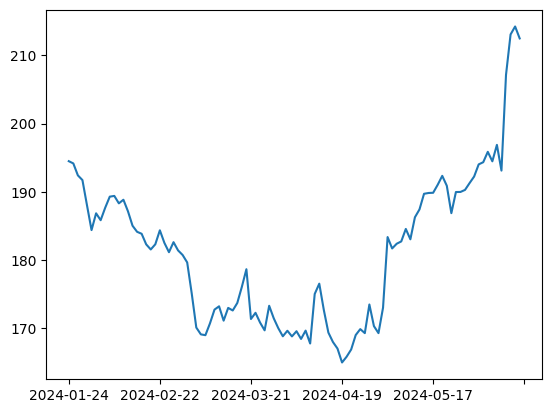

In [79]:
prices.plot()

- I can not extract more than 100 days without premium subscription for alpha vantage.
- For model training I will use `yfinance` library.

In [ ]:
list_of_stocks = [""]

In [7]:
for stock in stocks:
    try:
        # Access the 'Close' prices for each stock
        close_prices = data[stock]['Close']
        close_prices.to_csv(f"{stock}_close_prices.csv")
    except KeyError:
        # Handle the case where no data was returned for a stock
        print(f"No close price data available for {stock}")

In [8]:
close_prices[:5]

Date
2018-01-02    183.649994
2018-01-03    184.000000
2018-01-04    185.710007
2018-01-05    190.699997
2018-01-08    190.330002
Name: Close, dtype: float64

# ZTM APPROACH

In [5]:
# Define the stock symbols
stocks_full = [
    "AAPL", "MSFT", "JNJ", "PFE", "JPM", "GS", "AMZN", "NKE",
    "PG", "KO", "XOM", "CVX", "BA", "MMM", "SO", "DUK",
    "SPG", "DOW", "AA", "SIEGY", "NSRGY", "TM", "TCEHY",
    "PBR", "BABA"
]

stocks_some = [
    "AAPL", "JPM", "NSRGY", "AMZN"
]

# Fetch historical data for these stocks (use 2 years data)
data = yf.download(stocks_some, start="2021-01-01", end="2023-01-01", group_by="ticker")

[*********************100%%**********************]  4 of 4 completed


In [6]:
df = pd.DataFrame()
for stock in stocks_some:
    try:
        # Access the 'Close' prices for each stock
        close_prices = data[stock]['Close']
        if df.empty:
          df = pd.DataFrame(close_prices)
          df.rename(columns={'Close': f'Close_{stock}'}, inplace=True)
        else:
          df[f'Close_{stock}'] = close_prices
    except KeyError:
        # Handle the case where no data was returned for a stock
        print(f"No close price data available for {stock}")

df.head()

,Close_AAPL,Close_JPM,Close_NSRGY,Close_AMZN
Date,,,,
2021-01-04,129.410004,125.870003,118.610001,159.331497
2021-01-05,131.009995,125.650002,118.139999,160.925507
2021-01-06,126.599998,131.550003,115.680000,156.919006
2021-01-07,130.919998,135.869995,115.290001,158.108002
2021-01-08,132.050003,136.020004,114.839996,159.134995


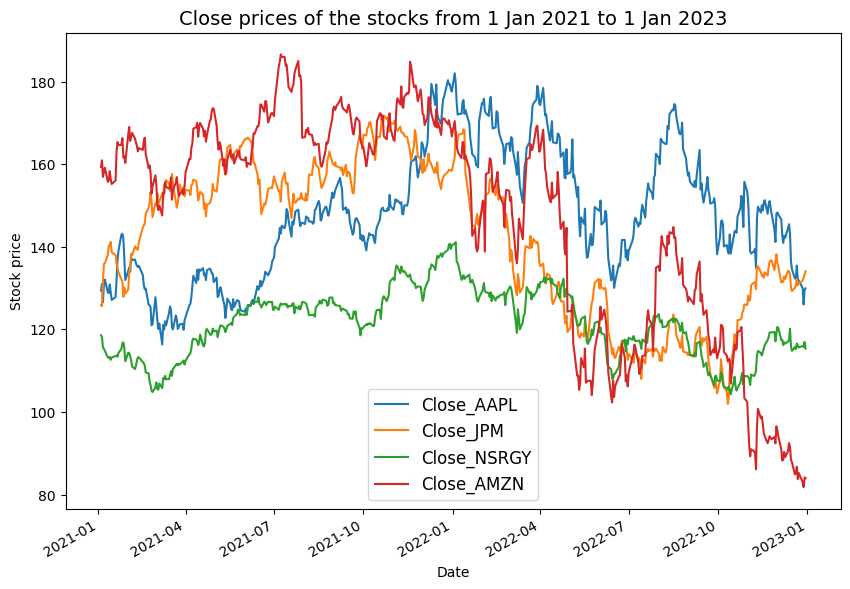

In [7]:
import matplotlib.pyplot as plt

df.plot(figsize=(10, 7))
plt.ylabel("Stock price")
plt.title("Close prices of the stocks from 1 Jan 2021 to 1 Jan 2023", fontsize=14)
plt.legend(fontsize=12);

In [8]:
df

,Close_AAPL,Close_JPM,Close_NSRGY,Close_AMZN
Date,,,,
2021-01-04,129.410004,125.870003,118.610001,159.331497
2021-01-05,131.009995,125.650002,118.139999,160.925507
2021-01-06,126.599998,131.550003,115.680000,156.919006
2021-01-07,130.919998,135.869995,115.290001,158.108002
2021-01-08,132.050003,136.020004,114.839996,159.134995
...,...,...,...,...
2022-12-23,131.860001,131.279999,115.639999,85.250000
2022-12-27,130.029999,131.740005,116.000000,83.040001
2022-12-28,126.040001,132.460007,115.720001,81.820000


In [9]:
df.to_csv("Stock_prices.csv")

In [10]:
import csv
from datetime import datetime

timesteps = []
stock_prices = []
with open("Stock_prices.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    stock_prices.append((float(line[1]), float(line[2]), float(line[3]))) # get the closing price as float


# View first 10 of each
timesteps[:10], stock_prices[:10]

([datetime.datetime(2021, 1, 4, 0, 0),
  datetime.datetime(2021, 1, 5, 0, 0),
  datetime.datetime(2021, 1, 6, 0, 0),
  datetime.datetime(2021, 1, 7, 0, 0),
  datetime.datetime(2021, 1, 8, 0, 0),
  datetime.datetime(2021, 1, 11, 0, 0),
  datetime.datetime(2021, 1, 12, 0, 0),
  datetime.datetime(2021, 1, 13, 0, 0),
  datetime.datetime(2021, 1, 14, 0, 0),
  datetime.datetime(2021, 1, 15, 0, 0)],
 [(129.41000366210938, 125.87000274658203, 118.61000061035156),
  (131.00999450683594, 125.6500015258789, 118.13999938964844),
  (126.5999984741211, 131.5500030517578, 115.68000030517578),
  (130.9199981689453, 135.8699951171875, 115.29000091552734),
  (132.0500030517578, 136.02000427246094, 114.83999633789062),
  (128.97999572753906, 138.0500030517578, 113.20999908447266),
  (128.8000030517578, 140.22000122070312, 113.12999725341797),
  (130.88999938964844, 140.35000610351562, 113.31999969482422),
  (128.91000366210938, 141.1699981689453, 112.6500015258789),
  (127.13999938964844, 138.63999938964

In [16]:
timesteps = df.index.to_numpy()
prices = df[['Close_AAPL', 'Close_JPM', 'Close_NSRGY', 'Close_AMZN']]

In [17]:
timesteps[:5], prices[:5]

(array(['2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
        '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
        '2021-01-08T00:00:00.000000000'], dtype='datetime64[ns]'),
             Close_AAPL   Close_JPM  Close_NSRGY  Close_AMZN
 Date                                                       
 2021-01-04  129.410004  125.870003   118.610001  159.331497
 2021-01-05  131.009995  125.650002   118.139999  160.925507
 2021-01-06  126.599998  131.550003   115.680000  156.919006
 2021-01-07  130.919998  135.869995   115.290001  158.108002
 2021-01-08  132.050003  136.020004   114.839996  159.134995)

In [18]:
split_size = int(0.8 * len(df)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(402, 101, 402, 101)

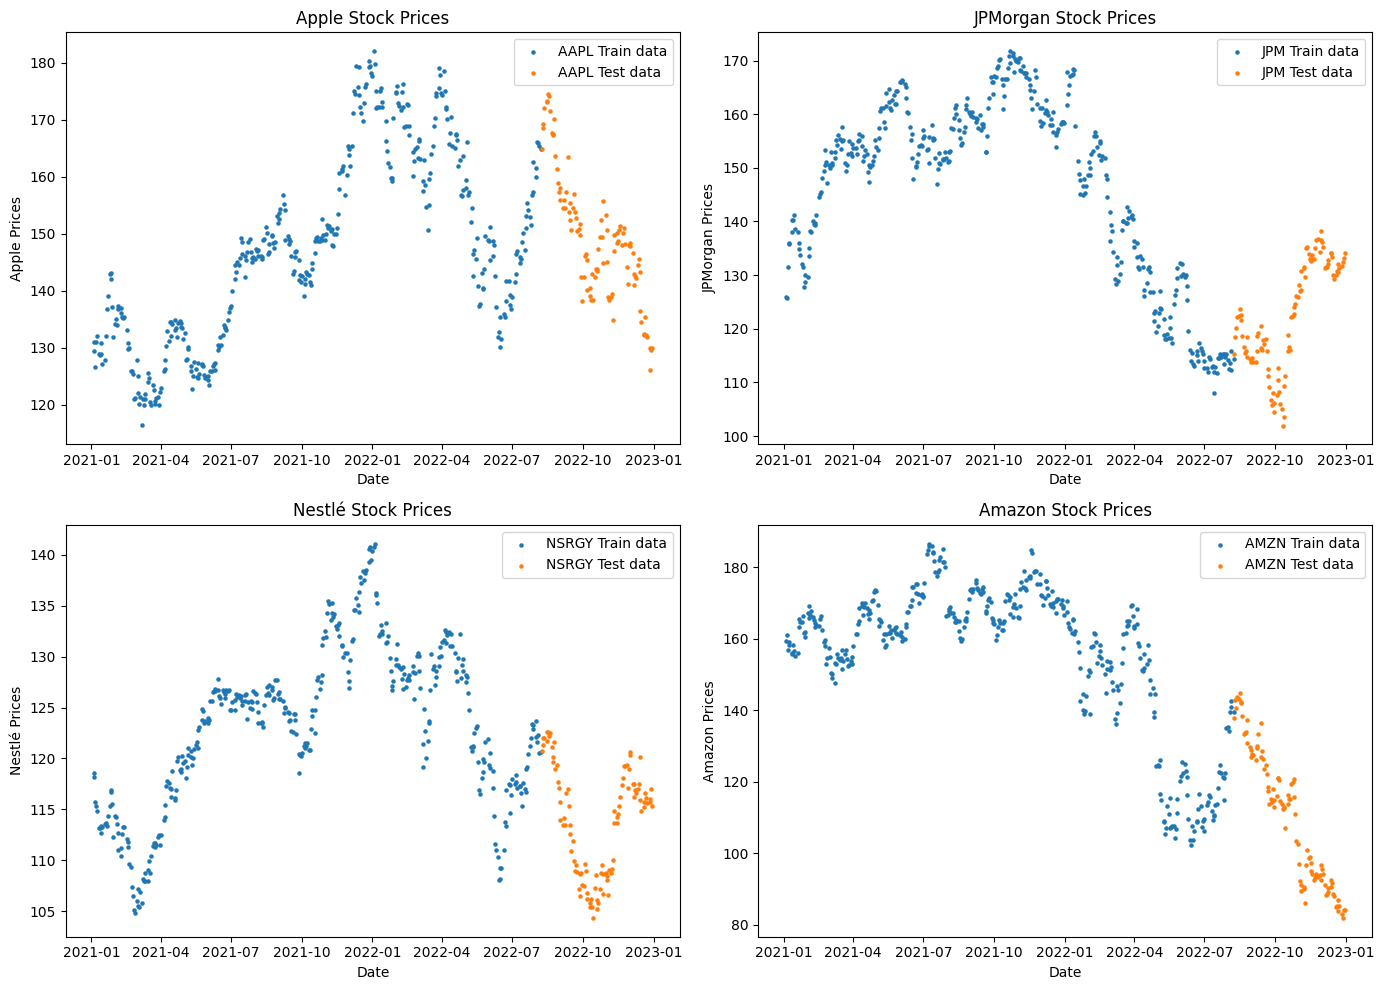

In [28]:
# Plot made splits for all stocks
plt.figure(figsize=(14, 10))  # Adjust the size to fit 4 plots comfortably

# Plot for Apple
plt.subplot(2, 2, 1)  # 2x2 grid, 1st subplot
plt.scatter(X_train, y_train['Close_AAPL'], s=5, label="AAPL Train data")
plt.scatter(X_test, y_test['Close_AAPL'], s=5, label="AAPL Test data")
plt.xlabel("Date")
plt.ylabel("Apple Prices")
plt.legend(fontsize=10)
plt.title('Apple Stock Prices')

# Plot for JPMorgan
plt.subplot(2, 2, 2)  # 2x2 grid, 2nd subplot
plt.scatter(X_train, y_train['Close_JPM'], s=5, label="JPM Train data")
plt.scatter(X_test, y_test['Close_JPM'], s=5, label="JPM Test data")
plt.xlabel("Date")
plt.ylabel("JPMorgan Prices")
plt.legend(fontsize=10)
plt.title('JPMorgan Stock Prices')

# Plot for Nestlé
plt.subplot(2, 2, 3)  # 2x2 grid, 3rd subplot
plt.scatter(X_train, y_train['Close_NSRGY'], s=5, label="NSRGY Train data")
plt.scatter(X_test, y_test['Close_NSRGY'], s=5, label="NSRGY Test data")
plt.xlabel("Date")
plt.ylabel("Nestlé Prices")
plt.legend(fontsize=10)
plt.title('Nestlé Stock Prices')

# Plot for Amazon
plt.subplot(2, 2, 4)  # 2x2 grid, 4th subplot
plt.scatter(X_train, y_train['Close_AMZN'], s=5, label="AMZN Train data")
plt.scatter(X_test, y_test['Close_AMZN'], s=5, label="AMZN Test data")
plt.xlabel("Date")
plt.ylabel("Amazon Prices")
plt.legend(fontsize=10)
plt.title('Amazon Stock Prices')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


## Preparint the data for modelling. Creating windows and horizons.

In [207]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [32]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=1)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [208]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


In [39]:
df_apple = df['Close_AAPL'].to_numpy()
df_nestle = df['Close_NSRGY'].to_numpy()
df_amazon = df['Close_JPM'].to_numpy()
df_jpmorgan = df['Close_AMZN'].to_numpy()
len(df_apple), len(df_nestle), len(df_amazon), len(df_jpmorgan)

(503, 503, 503, 503)

In [41]:
WINDOW_SIZE = 30
HORIZON = 7

Experiment to make windows with one of the datasets

In [42]:
full_windows, full_labels = make_windows(df_apple, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(467, 467)

In [44]:
for i in range(2):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [129.41000366 131.00999451 126.59999847 130.91999817 132.05000305
 128.97999573 128.80000305 130.88999939 128.91000366 127.13999939
 127.83000183 132.02999878 136.86999512 139.07000732 142.91999817
 143.16000366 142.05999756 137.08999634 131.96000671 134.13999939
 134.99000549 133.94000244 137.38999939 136.75999451 136.91000366
 136.00999451 135.38999939 135.13000488 135.36999512 133.19000244] -> Label: [130.83999634 129.71000671 129.86999512 126.         125.86000061
 125.34999847 120.98999786]
Window: [131.00999451 126.59999847 130.91999817 132.05000305 128.97999573
 128.80000305 130.88999939 128.91000366 127.13999939 127.83000183
 132.02999878 136.86999512 139.07000732 142.91999817 143.16000366
 142.05999756 137.08999634 131.96000671 134.13999939 134.99000549
 133.94000244 137.38999939 136.75999451 136.91000366 136.00999451
 135.38999939 135.13000488 135.36999512 133.19000244 130.83999634] -> Label: [129.71000671 129.86999512 126.         125.86000061 125.34999847
 120.98999

In [209]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [50]:
# testing the function
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split=0.15)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(396, 71, 396, 71)

Creating a model checkpoint callback function

In [58]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Building the model

The model's architecture:
- A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
- An output layer with linear activation (or no activation)
- Adam optimizer and MAE loss function
- Batch size of 128
- 100 epochs

In [61]:
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_0 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_0_test") # give the model a name so we can save it

# Compile model
model_0.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

In [73]:
# Fit model
model_0.fit(x=train_windows, # train windows of 30 timesteps of stock prices
            y=train_labels, # horizon value of 7 (using the previous 30 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=32,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_0.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
13/13 [==============================] - 4s 141ms/step - loss: 55.3773 - mae: 55.3773 - val_loss: 18.5620 - val_mae: 18.5620
Epoch 2/100
13/13 [==============================] - 2s 150ms/step - loss: 16.2098 - mae: 16.2098 - val_loss: 8.6935 - val_mae: 8.6935
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 10.1261 - mae: 10.1261 - val_loss: 11.4037 - val_mae: 11.4037
Epoch 4/100
13/13 [==============================] - 1s 78ms/step - loss: 8.6333 - mae: 8.6333 - val_loss: 8.1061 - val_mae: 8.1061
Epoch 5/100
13/13 [==============================] - 1s 49ms/step - loss: 8.2208 - mae: 8.2208 - val_loss: 7.0577 - val_mae: 7.0577
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 7.8031 - mae: 7.8031 - val_loss: 7.7457 - val_mae: 7.7457
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 7.5659 - mae: 7.5659 - val_loss: 8.0666 - val_mae: 8.0666
Epoch 8/100
13/13 [==============================] - 0s 5ms/step -

In [74]:
model_0.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 9ms/step - loss: 5.8258 - mae: 5.8258


[5.825759410858154, 5.825759410858154]

In [75]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [76]:
model_0_preds = make_preds(model_0, test_windows)
len(model_0_preds), model_0_preds[:10]

3/3 [==============================] - 0s 4ms/step


(71,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[162.58974, 155.1115 , 154.89848, 156.05592, 157.70244, 157.67252,
         155.36388],
        [157.86313, 154.03549, 152.59027, 157.49806, 158.53363, 158.18748,
         154.1775 ],
        [157.49837, 154.53888, 152.24397, 152.91505, 158.09462, 156.23143,
         152.94371],
        [156.98634, 151.53415, 149.52968, 153.38072, 155.16432, 155.46469,
         152.35963],
        [154.98247, 150.63365, 149.37508, 153.1209 , 151.77084, 152.87411,
         152.77411],
        [156.56514, 151.27458, 149.48055, 152.56252, 151.66808, 155.75105,
         153.07332],
        [157.81697, 153.76442, 152.40106, 157.35669, 153.77574, 159.83592,
         155.8592 ],
        [155.92946, 153.81396, 151.11066, 156.13455, 152.36809, 157.86708,
         156.37762],
        [157.96616, 153.56227, 149.75139, 156.08594, 153.79767, 160.2916 ,
         153.86702],
        [157.08922, 151.94893, 149.34702, 155.81546, 153.41924, 159.4972 ,
      

In [77]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

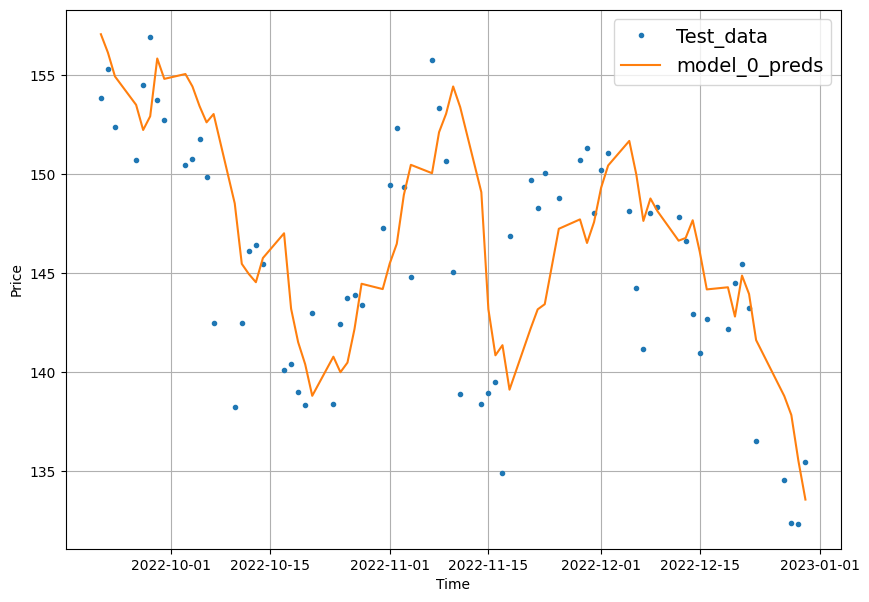

In [78]:
offset = 0
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_0_preds, axis=1), start=offset, format="-", label="model_0_preds")



## Testing the combined model

In [79]:
len(df_apple), len(df_nestle), len(df_amazon), len(df_jpmorgan)

(503, 503, 503, 503)

In [80]:
windows_apple, labels_apple = make_windows(df_apple, window_size=WINDOW_SIZE, horizon=HORIZON)
windows_nestle, labels_nestle = make_windows(df_nestle, window_size=WINDOW_SIZE, horizon=HORIZON)
windows_amazon, labels_amazon = make_windows(df_amazon, window_size=WINDOW_SIZE, horizon=HORIZON)
windows_jpmorgan, labels_jpmorgan = make_windows(df_jpmorgan, window_size=WINDOW_SIZE, horizon=HORIZON)

In [139]:
train_windows_apple, test_windows_apple, train_labels_apple, test_labels_apple = make_train_test_splits(
    windows_apple, labels_apple, test_split=0.15)
train_windows_nestle, test_windows_nestle, train_labels_nestle, test_labels_nestle = make_train_test_splits(
    windows_nestle, labels_nestle, test_split=0.15)
train_windows_amazon, test_windows_amazon, train_labels_amazon, test_labels_amazon = make_train_test_splits(
    windows_amazon, labels_amazon, test_split=0.15)
train_windows_jpmorgan, test_windows_jpmorgan, train_labels_jpmorgan, test_labels_jpmorgan = make_train_test_splits(
    windows_jpmorgan, labels_jpmorgan, test_split=0.15)

In [140]:
train_windows = train_windows_apple
train_windows.shape

(396, 30)

In [141]:
train_windows = np.concatenate((np.concatenate((np.concatenate((train_windows, train_windows_jpmorgan), axis = 0), train_windows_amazon), axis = 0), train_windows_nestle), axis = 0)
train_windows.shape

(1584, 30)

In [142]:
test_windows = test_windows_apple
test_windows.shape

(71, 30)

In [143]:
test_windows = np.concatenate((np.concatenate((np.concatenate((test_windows, test_windows_jpmorgan), axis = 0), test_windows_amazon), axis = 0), test_windows_nestle), axis = 0)
test_windows.shape

(284, 30)

In [144]:
train_labels = train_labels_apple
train_labels.shape

(396, 7)

In [145]:
train_labels = np.concatenate((np.concatenate((np.concatenate((train_labels, train_labels_jpmorgan), axis = 0), train_labels_amazon), axis = 0), train_labels_nestle), axis = 0)
train_labels.shape

(1584, 7)

In [147]:
test_labels = test_labels_apple
test_labels.shape

(71, 7)

In [148]:
test_labels = np.concatenate((np.concatenate((np.concatenate((test_labels, test_labels_jpmorgan), axis = 0), test_labels_amazon), axis = 0), test_labels_nestle), axis = 0)
test_labels.shape

(284, 7)

In [149]:
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_test") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [150]:
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=32,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
50/50 [==============================] - 4s 51ms/step - loss: 39.0372 - mae: 39.0372 - mse: 4514.2241 - val_loss: 8.7621 - val_mae: 8.7621 - val_mse: 117.3582
Epoch 2/100
50/50 [==============================] - 2s 34ms/step - loss: 7.8669 - mae: 7.8669 - mse: 107.2917 - val_loss: 8.5177 - val_mae: 8.5177 - val_mse: 108.4109
Epoch 3/100
50/50 [==============================] - 3s 54ms/step - loss: 7.4296 - mae: 7.4296 - mse: 95.5073 - val_loss: 7.8894 - val_mae: 7.8894 - val_mse: 93.2125
Epoch 4/100
50/50 [==============================] - 2s 49ms/step - loss: 7.2016 - mae: 7.2016 - mse: 89.4064 - val_loss: 7.4041 - val_mae: 7.4041 - val_mse: 85.7939
Epoch 5/100
50/50 [==============================] - 1s 21ms/step - loss: 6.9947 - mae: 6.9947 - mse: 84.7434 - val_loss: 8.2904 - val_mae: 8.2904 - val_mse: 101.6789
Epoch 6/100
50/50 [==============================] - 2s 39ms/step - loss: 6.6887 - mae: 6.6887 - mse: 78.0999 - val_loss: 6.8138 - val_mae: 6.8138 - val_mse: 73.4

In [172]:
model_1.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 4ms/step - loss: 4.4264 - mae: 4.4264 - mse: 36.4872


[4.426417827606201, 4.426417827606201, 36.48716354370117]

Make a prediction for Apple stocks

In [168]:
model_1_preds = make_preds(model_1, test_windows_apple)
len(model_1_preds), model_1_preds[:10]

3/3 [==============================] - 0s 6ms/step


(71,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[160.09477, 156.91786, 157.49962, 158.5714 , 155.06364, 156.02467,
         159.74358],
        [156.92023, 155.67888, 156.21333, 157.83266, 152.49554, 154.20941,
         156.6319 ],
        [156.63876, 156.5614 , 155.99516, 157.62854, 153.74873, 152.83493,
         156.90422],
        [154.44078, 154.68904, 154.76021, 154.73402, 151.79132, 152.34763,
         155.23929],
        [152.46317, 152.60646, 152.24248, 153.45647, 148.67062, 148.61143,
         153.99382],
        [153.39014, 152.74901, 151.65733, 153.54887, 148.69736, 148.87857,
         154.58095],
        [155.548  , 154.36836, 154.11446, 155.47827, 152.09286, 152.90501,
         155.85782],
        [154.68588, 152.74963, 152.94768, 154.64734, 151.73062, 151.71053,
         156.15128],
        [154.61462, 152.30952, 152.9711 , 156.1179 , 151.46501, 152.47624,
         155.76233],
        [151.6359 , 151.93335, 152.11464, 152.52005, 150.4332 , 152.41785,
      

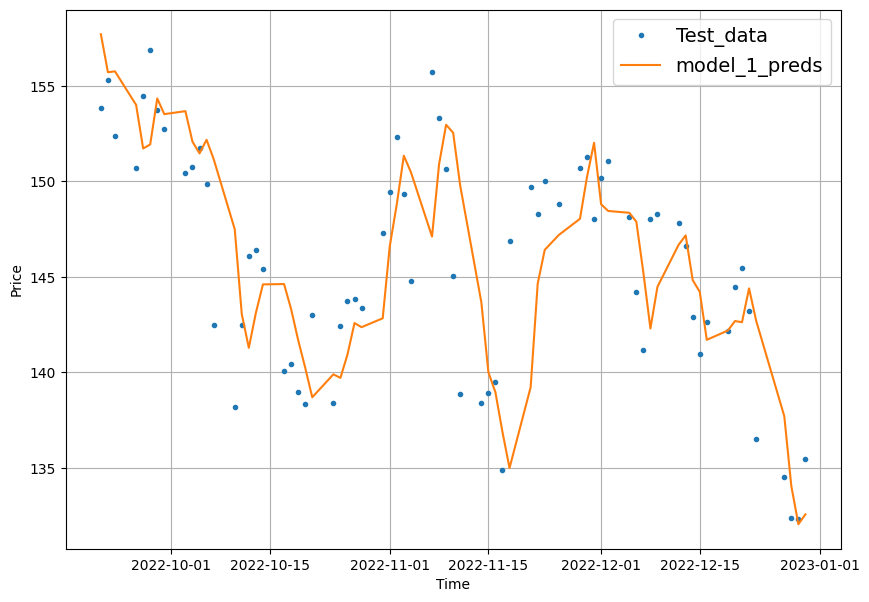

In [171]:
offset = 0
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows_apple):], values=test_labels_apple[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows_apple):], values=tf.reduce_mean(model_1_preds, axis=1), start=offset, format="-", label="model_1_preds")


## Preparing data for the big model

In [211]:
# function for combining the data
def combine_data(train_data, test_data):
    return (np.concatenate(train_data, axis=0), np.concatenate(test_data, axis=0))

In [212]:
# function for normalization performing
def normalize_data(train_data, test_data):
    mean = train_data.mean(axis=0)
    std = train_data.std(axis=0)
    normalized_train = (train_data - mean) / std
    normalized_test = (test_data - mean) / std
    return normalized_train, normalized_test

In [213]:
# Define the stock symbols
stocks_full = [
    "AAPL", "MSFT", "JNJ", "PFE", "JPM", "GS", "AMZN", "NKE",
    "PG", "KO", "XOM", "CVX", "BA", "MMM", "SO", "DUK",
    "SPG", "DOW", "AA", "SIEGY", "NSRGY", "TM", "TCEHY",
    "PBR", "BABA"
]

# Fetch historical data for these stocks (use 3 years data)
data = yf.download(stocks_full, start="2020-01-01", end="2023-01-01", group_by="ticker")

[*********************100%%**********************]  25 of 25 completed


In [214]:
df_full = pd.DataFrame()
for stock in stocks_full:
    try:
        # Access the 'Close' prices for each stock
        close_prices = data[stock]['Close']
        if df_full.empty:
          df_full = pd.DataFrame(close_prices)
          df_full.rename(columns={'Close': f'Close_{stock}'}, inplace=True)
        else:
          df_full[f'Close_{stock}'] = close_prices
    except KeyError:
        # Handle the case where no data was returned for a stock
        print(f"No close price data available for {stock}")

df_full.head()

,Close_AAPL,Close_MSFT,Close_JNJ,Close_PFE,Close_JPM,Close_GS,Close_AMZN,Close_NKE,Close_PG,Close_KO,...,Close_DUK,Close_SPG,Close_DOW,Close_AA,Close_SIEGY,Close_NSRGY,Close_TM,Close_TCEHY,Close_PBR,Close_BABA
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,75.087502,160.619995,145.970001,37.134724,141.089996,234.320007,94.900497,102.199997,123.410004,54.990002,...,90.339996,145.089996,53.750000,21.420000,66.510002,108.099998,142.240005,49.880001,16.270000,219.770004
2020-01-03,74.357498,158.619995,144.279999,36.935486,138.339996,231.580002,93.748497,101.919998,122.580002,54.689999,...,90.400002,145.350006,52.419998,21.500000,64.750000,109.110001,140.750000,49.029999,15.990000,217.000000
2020-01-06,74.949997,159.029999,144.100006,36.888046,138.229996,233.949997,95.143997,101.830002,122.750000,54.669998,...,90.839996,146.110001,52.209999,21.000000,65.010002,109.989998,140.770004,48.770000,16.219999,216.639999
2020-01-07,74.597504,157.580002,144.979996,36.764706,135.880005,235.490005,95.343002,101.779999,121.989998,54.250000,...,90.269997,144.449997,52.189999,21.320000,64.739998,107.940002,141.509995,49.779999,16.059999,217.630005
2020-01-08,75.797501,160.089996,144.960007,37.058823,136.940002,237.759995,94.598503,101.550003,122.510002,54.349998,...,90.400002,145.399994,52.730000,20.459999,65.239998,106.370003,141.160004,49.650002,15.700000,218.000000


In [215]:
train_windows_list = []
train_labels_list = []
test_windows_list = []
test_labels_list = []

for stock in stocks_full:
    stock_column = f'Close_{stock}'
    stock_data = df_full[stock_column].to_numpy()

    windows, labels = make_windows(stock_data, window_size=WINDOW_SIZE, horizon=HORIZON)
    train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels, test_split=0.15)

    train_windows_list.append(train_windows)
    train_labels_list.append(train_labels)
    test_windows_list.append(test_windows)
    test_labels_list.append(test_labels)

In [216]:
train_windows, test_windows = combine_data(train_windows_list, test_windows_list)
train_labels, test_labels = combine_data(train_labels_list, test_labels_list)

In [218]:
tf.random.set_seed(42)

## Building the big model

In [219]:
# build the model
model_big = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_large_scale")

# compile the model
model_big.compile(optimizer='adam', loss='mae', metrics=["mae", "mse"])

# model_big.add(layers.Reshape((HORIZON, NUM_STOCKS)))

In [220]:
# fit the model
model_big.fit(x=train_windows,
          y=train_labels,
          epochs=100,
          batch_size=32,
          verbose=1,
          validation_data=(test_windows, test_labels),
          callbacks=[create_model_checkpoint(model_name=model_big.name)])

Epoch 1/100
479/479 [==============================] - 3s 4ms/step - loss: 7.6301 - mae: 7.6301 - mse: 388.8286 - val_loss: 5.0124 - val_mae: 5.0124 - val_mse: 54.4375
Epoch 2/100
479/479 [==============================] - 2s 4ms/step - loss: 4.8078 - mae: 4.8078 - mse: 63.8733 - val_loss: 4.5517 - val_mae: 4.5517 - val_mse: 47.4686
Epoch 3/100
479/479 [==============================] - 2s 4ms/step - loss: 4.5436 - mae: 4.5436 - mse: 57.4047 - val_loss: 4.2808 - val_mae: 4.2808 - val_mse: 41.2733
Epoch 4/100
479/479 [==============================] - 2s 4ms/step - loss: 4.3492 - mae: 4.3492 - mse: 52.4698 - val_loss: 4.0249 - val_mae: 4.0249 - val_mse: 37.2454
Epoch 5/100
479/479 [==============================] - 1s 3ms/step - loss: 4.2536 - mae: 4.2536 - mse: 50.5326 - val_loss: 4.1227 - val_mae: 4.1227 - val_mse: 39.0849
Epoch 6/100
479/479 [==============================] - 1s 3ms/step - loss: 4.1343 - mae: 4.1343 - mse: 48.3298 - val_loss: 4.4196 - val_mae: 4.4196 - val_mse: 42.44

In [222]:
model_big.evaluate(test_windows, test_labels)

85/85 [==============================] - 1s 6ms/step - loss: 3.5792 - mae: 3.5792 - mse: 29.1971


[3.5792407989501953, 3.5792407989501953, 29.197059631347656]

In [229]:
model_big.summary()

Model: "model_large_scale"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               3968      
                                                                 
 dense_15 (Dense)            (None, 7)                 903       
                                                                 
Total params: 4871 (19.03 KB)
Trainable params: 4871 (19.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [230]:
model_big.save('model_25s.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Make a test on apple data

In [224]:
model_big_preds = make_preds(model_big, test_windows_apple)
len(model_big_preds), model_big_preds[:10]

3/3 [==============================] - 0s 10ms/step


(71,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[159.59406, 159.93661, 160.73283, 161.2059 , 160.41487, 161.28633,
         161.8412 ],
        [153.41965, 153.46638, 154.3947 , 154.95361, 154.18535, 155.27388,
         155.05185],
        [153.02658, 153.35864, 154.70589, 154.42134, 154.32397, 154.83197,
         155.64975],
        [150.83038, 151.43835, 152.44325, 152.52676, 151.94882, 152.79845,
         152.97427],
        [149.57971, 149.7954 , 151.45027, 150.92825, 150.75447, 151.67207,
         151.05623],
        [151.84842, 152.44841, 153.08488, 153.72954, 153.0856 , 153.93686,
         153.49419],
        [154.0577 , 154.20343, 155.05553, 155.87563, 155.02626, 156.33388,
         155.7203 ],
        [152.06114, 152.33272, 153.7077 , 153.53589, 153.02673, 154.1764 ,
         154.29413],
        [150.67612, 151.00961, 152.19597, 152.60013, 151.74142, 153.04742,
         153.29128],
        [148.57678, 149.40564, 150.60205, 150.40677, 149.84248, 150.83812,
      

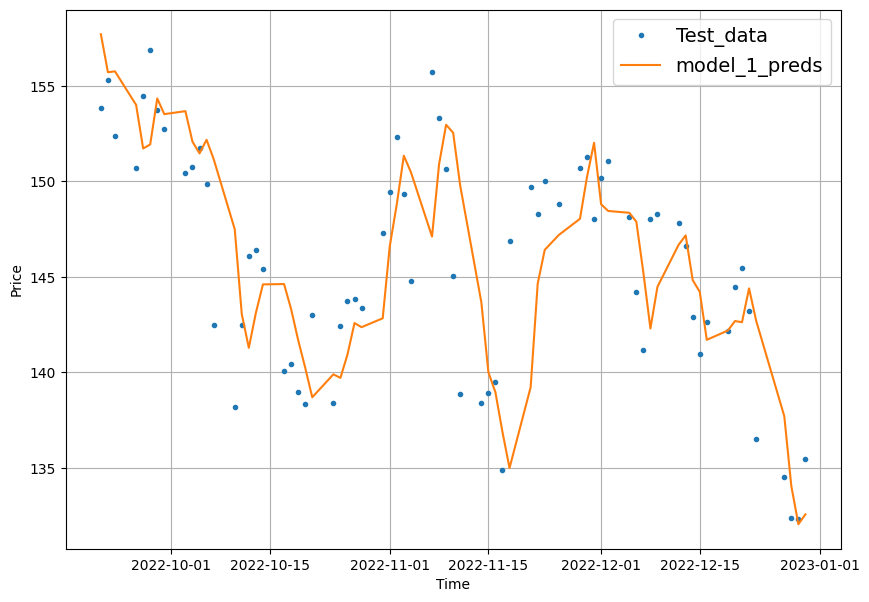

In [225]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows_apple):], values=test_labels_apple[:, 0], label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows_apple):], values=tf.reduce_mean(model_1_preds, axis=1), format="-", label="model_1_preds")


## Make predictions

In [226]:
# function to make predictons on the 30 days price data
def make_prediction(model, last_30_days):
    """
    Make a prediction based on the last 30 days of data.

    Args:
    model (tf.keras.Model): Trained TensorFlow model to use for predictions.
    last_30_days (np.array): Array of the last 30 days of prices, shape (30,).

    Returns:
    np.array: Predicted prices for the next horizon days.
    """
    # Ensure data is in the correct shape [batch_size, window_size, num_features]
    last_30_days = last_30_days.reshape((1, -1, 1))  # Assuming only one feature, reshape accordingly

    # Make predictions
    predictions = model.predict(last_30_days)
    return predictions.flatten()  # Flatten to simplify usage

In [269]:
# function that makes a plot for the prediction

import matplotlib.dates as mdates

def plot_predictions(dates, historical_data, last_30_days, predicted_prices, show_full_history=True):
    """
    Plot historical data, the most recent 30 days, and the predicted prices with a connected view, using date formatting on the x-axis.

    Args:
    dates (list or pd.Series): Dates corresponding to the historical data.
    historical_data (np.array): Full array of historical prices.
    last_30_days (np.array): Array of the last 30 days of prices used for the prediction.
    predicted_prices (np.array): Predicted future prices from the model.
    show_full_history (bool): If True, show all historical data; if False, show only the last 30 days with every third day.
    """
    plt.figure(figsize=(12, 6))
    total_days = len(historical_data)
    future_days = len(predicted_prices)

    # Create a date range for the predictions
    last_date = pd.to_datetime(dates[-1])
    prediction_dates = pd.date_range(last_date, periods=future_days + 1, freq='D')[1:]  # start from the day after last_date

    # Combine historical dates and prediction dates
    full_dates = pd.to_datetime(dates).append(prediction_dates)

    if show_full_history:
        # Plot all historical data
        plt.plot(full_dates[:total_days], historical_data, label="Historical Data", color='blue')
        # Highlight the last 30 days in a different color
        plt.plot(full_dates[total_days-30:total_days], last_30_days, label="Last 30 Days", color='orange')
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # locate months
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format dates as Year-Month
    else:
        # Start days at total_days - 30 to only show the last 30 days
        plt.plot(full_dates[total_days-30:total_days], last_30_days, label="Last 30 Days", color='orange')
        plt.plot(full_dates[total_days-1:total_days+future_days], np.concatenate(([last_30_days[-1]], predicted_prices)), label="Predictions", color='red')
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # locate every third day
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format dates as Year-Month-Day

    plt.title("Stock Price Predictions")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.gcf().autofmt_xdate()  # auto-format x-axis dates to fit nicely
    plt.show()


In [261]:
# make the last 30 prices of apple stock
apple_prices = df['Close_AAPL'].values
dates = df.index

In [231]:
last_30_days_apple = apple_prices[-30:]

In [232]:
loaded_model = tf.keras.models.load_model('model_25s.h5')

In [234]:
predictions = make_prediction(loaded_model, last_30_days_apple)

1/1 [==============================] - 0s 331ms/step


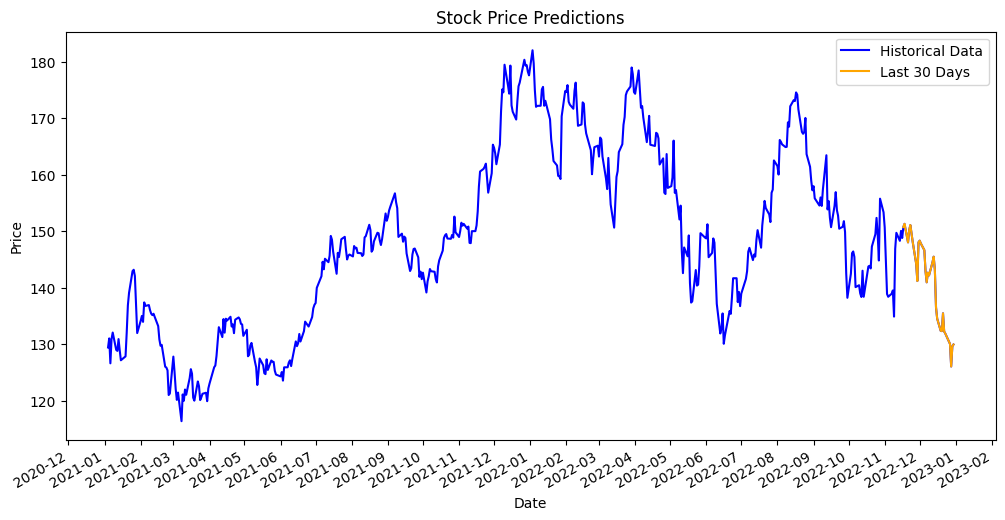

In [270]:
plot_predictions(dates, apple_prices, last_30_days_apple, predictions)

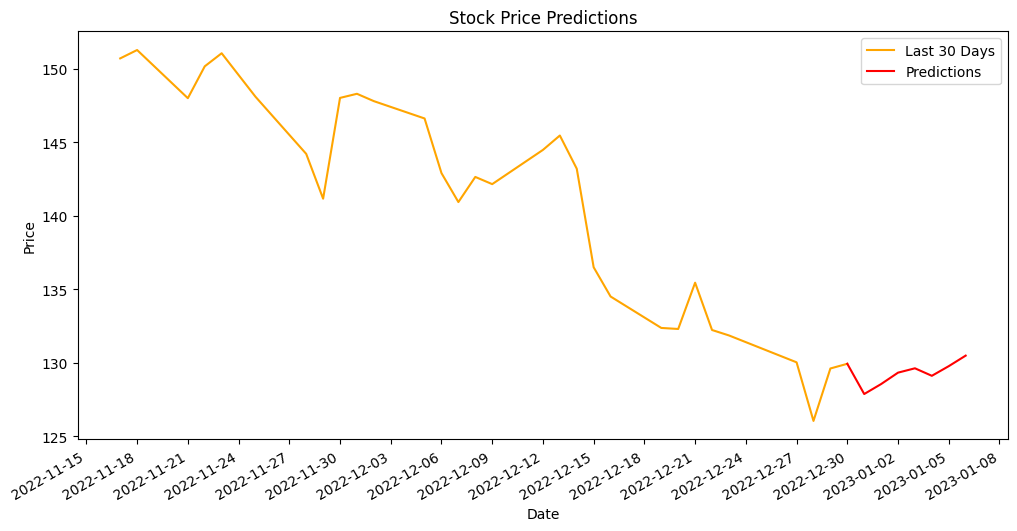

In [271]:
plot_predictions(dates, apple_prices, last_30_days_apple, predictions, show_full_history=False)